In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

pd.set_option('display.max_columns', 500)

%matplotlib notebook

In [2]:
data_path = os.getcwd()[:-len('Notebooks')] + 'Data/Covid/'
os.listdir(data_path)

['time_series_covid19_confirmed_global.csv',
 '.DS_Store',
 '200427COVID19MEXICO1.csv',
 '200417COVID19MEXICO.csv',
 '200427COVID19MEXICO.numbers',
 '200427COVID19MEXICO.csv',
 'time_series_covid19_recovered_global.csv',
 'time_series_covid19_deaths_global.csv']

In [3]:
confirmed = pd.read_csv(data_path + 'time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv(data_path + 'time_series_covid19_deaths_global.csv')
recovered = pd.read_csv(data_path + 'time_series_covid19_recovered_global.csv')

In [4]:
pd.read_csv?

In [5]:
data = pd.read_csv(data_path + '200427COVID19MEXICO.csv', encoding = 'ISO-8859–1')
datau = pd.read_csv(data_path + '200427COVID19MEXICO1.csv')

In [6]:
data.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [7]:
confirmed.head(1)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906


In [8]:
mexico = confirmed[confirmed['Country/Region'] == 'Mexico'][list(confirmed.columns)[5::]]
china = confirmed[confirmed['Country/Region'] == 'China'][list(confirmed.columns)[5::]]
italy = confirmed[confirmed['Country/Region'] == 'Italy'][list(confirmed.columns)[5::]]
eua = confirmed[confirmed['Country/Region'] == 'US'][list(confirmed.columns)[5::]]

In [9]:
eua

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
225,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,58,60,68,74,98,118,149,217,262,402,518,583,959,1281,1663,2179,2727,3499,4632,6421,7783,13747,19273,25600,33276,43843,53736,65778,83836,101657,121465,140909,161831,188172,213372,243762,275586,308853,337072,366667,396223,429052,461437,496535,526396,555313,580619,607670,636350,667801,699706


In [10]:
china = china.sum()

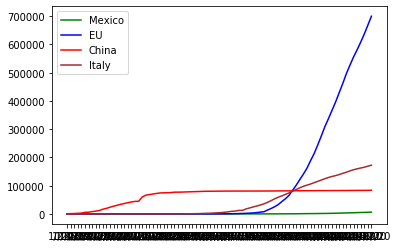

In [11]:
plt.plot(mexico.columns, mexico.T, color = 'g', label = 'Mexico')
plt.plot(eua.columns, eua.T, color = 'b', label = 'EU')
plt.plot(mexico.columns, china, color = 'r', label = 'China')
plt.plot(italy.columns, italy.T, color = 'brown', label = 'Italy')
plt.legend()

# Ingeniería de variables

In [12]:
data.head(2)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-27,09e8dc,2,9,15,1,15,15,37,2,2020-04-09,2020-03-28,9999-99-99,2,1,75,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,99,MÃ©xico,99,1
1,2020-04-27,1dd782,2,12,9,1,15,9,3,1,2020-04-16,2020-04-02,9999-99-99,97,2,31,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,99,MÃ©xico,99,97


In [15]:
datau.head(2)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-27,09e8dc,2,9,15,1,15,15,37,2,2020-04-09,2020-03-28,9999-99-99,2,1,75,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,99,MÃ©xico,99,1
1,2020-04-27,1dd782,2,12,9,1,15,9,3,1,2020-04-16,2020-04-02,9999-99-99,97,2,31,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,99,MÃ©xico,99,97


In [13]:
data.shape

(71103, 35)